<a href="https://colab.research.google.com/github/MountainFishCheng/MountainFishCheng/blob/main/ML00103_%E6%B1%BD%E8%BB%8A%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Try myself**

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TQC+/data/cardata.txt', header = None)
#前六個屬性為為input(買價,維修保養價格,門數,載人量,行李箱大小,安全);最後一個屬性為預測值y(汽車可接受度)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Convert string data to numerical data將字串資料轉換為數值資料
from sklearn.preprocessing import LabelEncoder

le_en = []

for i in range(df.shape[1]):
  le = LabelEncoder().fit(df[i])
  le_en.append(le)
  print(df)
  print("#########################################")
  df[i] = le_en[-1].transform(df[i])
  print(df)


          0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
...     ...    ...    ...   ...    ...   ...    ...
1723    low    low  5more  more    med   med   good
1724    low    low  5more  more    med  high  vgood
1725    low    low  5more  more    big   low  unacc
1726    low    low  5more  more    big   med   good
1727    low    low  5more  more    big  high  vgood

[1728 rows x 7 columns]
#########################################
      0      1      2     3      4     5      6
0     3  vhigh      2     2  small   low  unacc
1     3  vhigh      2     2  small   med  unacc
2     3  vhigh      2     2  small  high  unacc
3     3  vhigh      2     2    med   low  unacc
4     3  vhigh      2     2    med   med  unacc
...  ..    ...    ...

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Build a Random Forest classifier建立隨機森林分類器(n_estimators=200, max_depth=8, random_state=7)
model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=7)
model.fit(X, y)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=7)

In [7]:
# Cross validation交叉驗證,三折交叉驗證(cv = 3),每次選擇 1 份作為測試集，其餘 2 份作為訓練集。會重複3次,故會得到3個分數
from sklearn.model_selection import cross_val_score
cv_dic = cross_val_score(model, X, y, cv = 3)
print(cv_dic)
score = cv_dic.mean() # 針對三個分數取平均值
print(f'Accuracy of classifier:{score*100:.2f}%')

[0.72395833 0.80208333 0.80381944]
Accuracy of classifier:77.66%


In [8]:
# Testing encoding on single data instance測試單個資料實例上的編碼
data1 = pd.DataFrame(['high', 'low', '2', 'more', 'med', 'high']).T

for i in range(data1.shape[1]):
  data1[i] = le_en[i].transform(data1[i])
  print(data1)

   0    1  2     3    4     5
0  0  low  2  more  med  high
   0  1  2     3    4     5
0  0  1  2  more  med  high
   0  1  2     3    4     5
0  0  1  0  more  med  high
   0  1  2  3    4     5
0  0  1  0  2  med  high
   0  1  2  3  4     5
0  0  1  0  2  1  high
   0  1  2  3  4  5
0  0  1  0  2  1  0


In [9]:
y1 = model.predict(data1)
print(y1)
label = le_en[-1].inverse_transform(y1)
print(label)

[0]
['acc']


In [10]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(25, 200, 8).astype(int) #[25,50,75,100,125,150,175,200]
train_scores, validation_scores = validation_curve(
    model, X, y, param_name='n_estimators', param_range=param_range, cv=5
)

# n_estimators（決策樹的數量）

In [11]:
print("##### VALIDATION CURVES #####")
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

##### VALIDATION CURVES #####

Param: n_estimators
Training scores:
 [[0.97467438 0.97105644 0.97105644 0.97686189 0.96529284]
 [0.97322721 0.97322721 0.97539797 0.98698482 0.96963124]
 [0.97684515 0.97467438 0.97322721 0.98770788 0.98047722]
 [0.97612156 0.97684515 0.97467438 0.98770788 0.97903109]
 [0.97467438 0.97684515 0.97539797 0.98698482 0.98047722]
 [0.97539797 0.97539797 0.97756874 0.98553868 0.97903109]
 [0.97322721 0.97612156 0.97756874 0.98553868 0.97758496]
 [0.97322721 0.97612156 0.97539797 0.98626175 0.97541576]]

Param: n_estimators
Validation scores:
 [[0.66184971 0.78612717 0.79768786 0.8057971  0.88115942]
 [0.67919075 0.80057803 0.78612717 0.7884058  0.89855072]
 [0.65317919 0.79190751 0.78612717 0.78550725 0.90434783]
 [0.63294798 0.79479769 0.76589595 0.7826087  0.91304348]
 [0.66473988 0.77745665 0.79190751 0.79130435 0.90144928]
 [0.70520231 0.77745665 0.79479769 0.79130435 0.90434783]
 [0.65028902 0.7716763  0.79479769 0.7884058  0.90434783]
 [0.66763006 0.7716

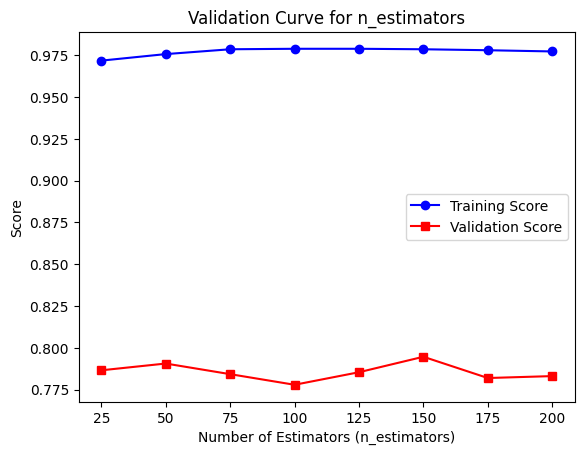

In [12]:
# 繪製驗證曲線
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(validation_scores, axis=1)

plt.plot(param_range, train_mean, label="Training Score", marker='o', color='blue')
plt.plot(param_range, val_mean, label="Validation Score", marker='s', color='red')

plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Score")
plt.title("Validation Curve for n_estimators")
plt.legend()
plt.show()